## Step 3 - Exploring Data & Visualizing

In this step, we will Visualizing and understanding the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("IMDb_rating_data_after_scrubbing.csv", index_col = 0)
data.head()

,Name,Genre,Year,Imdb Rating,Director,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
0,The Dark Knight,Action,2008,9.0,Christopher Nolan,2573361,534.86,9.0,1480015,8.7,265210
1,The Lord of the Rings: The Return of the King,Action,2003,9.0,Peter Jackson,1786873,377.85,9.0,1030137,8.9,218645
2,Inception,Action,2010,8.8,Christopher Nolan,2283048,292.58,8.8,1263368,8.7,294017
3,The Lord of the Rings: The Two Towers,Action,2002,8.8,Peter Jackson,1613775,342.55,8.8,925097,8.7,202157
4,The Lord of the Rings: The Fellowship of the Ring,Action,2001,8.8,Peter Jackson,1807955,315.54,8.8,1025720,8.8,229858


In [3]:
display(data.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

,Year,Imdb Rating,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
count,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00
mean,1997.57,7.55,237881.73,76.86,7.50,138646.45,7.60,30916.20
std,21.44,0.64,307561.71,101.61,0.67,177012.99,0.60,39753.88
min,1920.00,1.90,25037.00,0.00,1.70,2582.00,2.70,110.00
25%,1989.00,7.20,49250.00,9.54,7.20,29307.50,7.30,5630.50
50%,2005.00,7.60,113143.00,53.71,7.60,67334.00,7.70,14094.00
75%,2013.00,8.00,289909.00,76.86,7.90,173077.00,8.00,39731.00
max,2022.00,9.30,2601939.00,936.66,9.30,1480017.00,9.40,294019.00


## Histogram of frequency of Imdb Rating

#### In the chart below we can see that the most common rating is in the range of 7-8

Text(0, 0.5, 'Frequency')

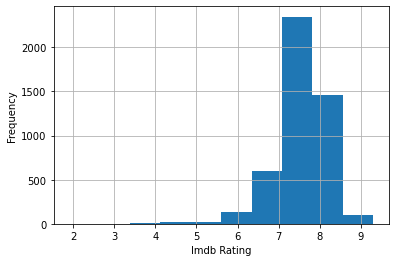

In [4]:
data['Imdb Rating'].hist(bins=10)
plt.xlabel('Imdb Rating')
plt.ylabel('Frequency')

## Histogram of frequency of male grading
 

#### In the chart below we can see that the most common rating is in the range of 7-8.5

Text(0, 0.5, 'Frequency')

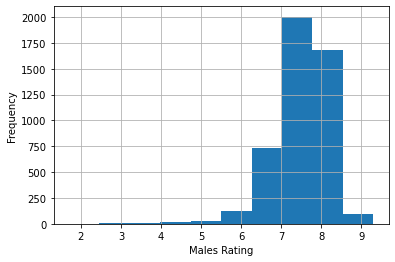

In [5]:
data['malesRating'].hist(bins=10)
plt.xlabel('Males Rating')
plt.ylabel('Frequency')

## Histogram of frequency of Females grading

#### In the chart below we can see that the most common rating is in the range of 7.5 - 8.5

Text(0, 0.5, 'Frequency')

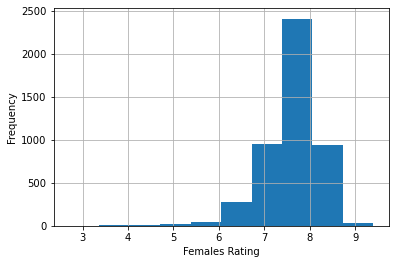

In [6]:
data['femalesRating'].hist(bins=10)
plt.xlabel('Females Rating')
plt.ylabel('Frequency')

### Crosstab by Genre & malesRating

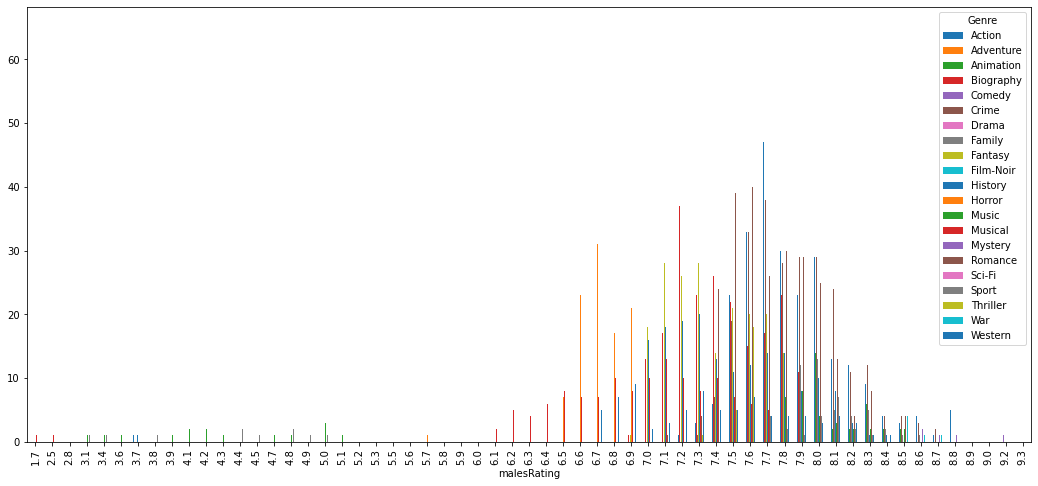

In [7]:
ct1 = pd.crosstab(data['malesRating'], data['Genre'])
barplot1 = ct1.plot.bar(figsize=(18,8))

### Crosstab by Genre & femalesRating

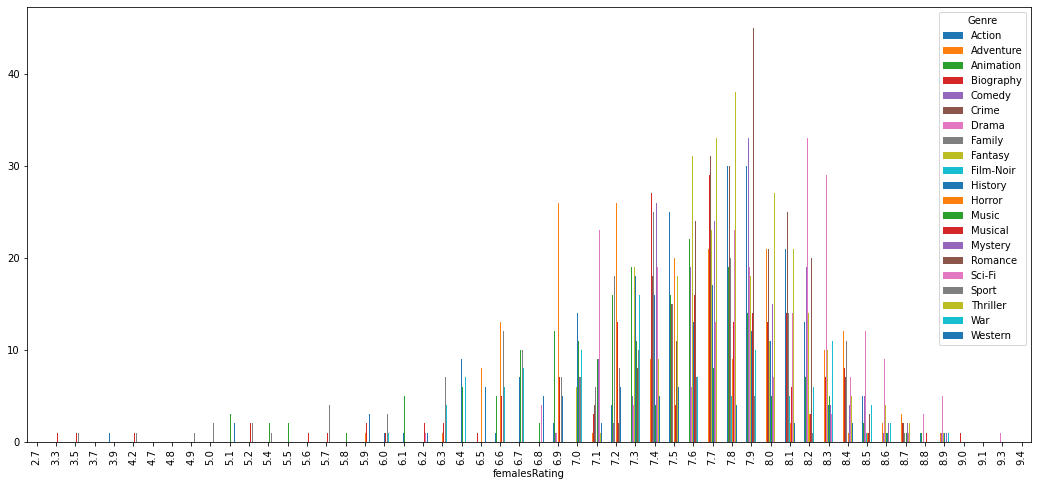

In [8]:
ct2 = pd.crosstab(data['femalesRating'], data['Genre'])
barplot2 = ct2.plot.bar(figsize=(18,8))

The graph for men and women can be seen to be similar to the Normal distribution graph

### Crosstab by Genre & Imdb Rating

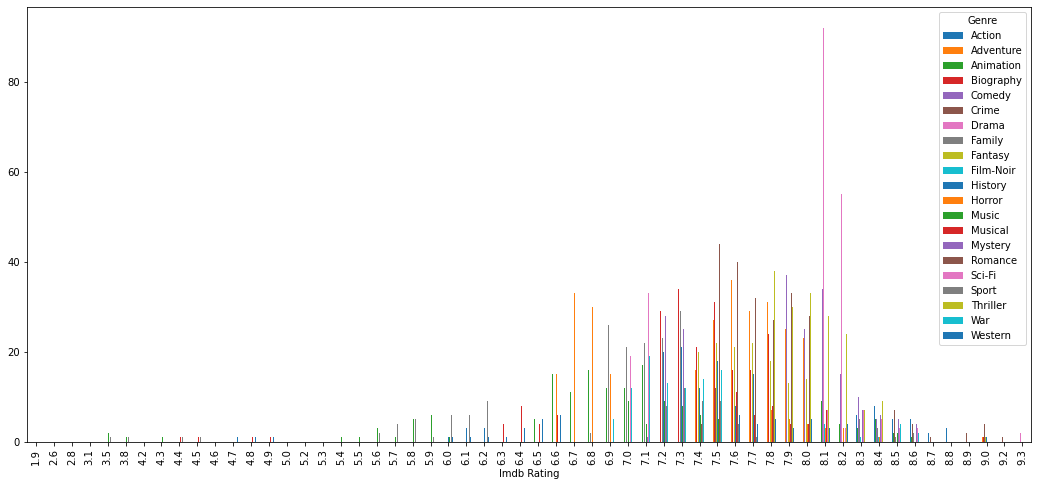

In [9]:
ct3 = pd.crosstab(data['Imdb Rating'], data['Genre'])
barplot3 = ct3.plot.bar(figsize=(18,8))

#### In this graph it can be seen that it is distributed as Negative siding

#### Can see that there is a dependency between the columns

In [10]:
#---------------------------
def plot_high_correlated_scatters(df):
    correlations, tuple_arr = get_highly_correlated_cols(df)
    fig, ax = plt.subplots(1, len(correlations), figsize=(20,5))

    indx_sort = np.argsort(correlations)
    for i, n_correlation in enumerate(indx_sort): 
        col_lt, col_rt = tuple_arr[n_correlation]
        col_lt_name = df.columns[tuple_arr[i][0]]
        col_rt_name = df.columns[tuple_arr[i][1]]
        title = "corr('%s', '%s')=%4.2f" %(col_lt_name, col_rt_name, correlations[n_correlation])
        sns.regplot(x=df.columns[tuple_arr[i][0]], y=df.columns[tuple_arr[i][1]], data=df, ax=ax[i], fit_reg=False).set_title(title)
#---------------------------
def get_highly_correlated_cols(df):
    correlatedColumns = []
    corr = df.corr(method='pearson')
    print (corr)
    indices = corr.index
    columns = corr.columns
    posthreshold = 0.5
        
    for cInd, c in enumerate(columns):
        for rInd, r in enumerate(indices):
            if (c != r) and (corr[c][r] > posthreshold) and (not is_in_array(correlatedColumns, cInd, rInd)):
                correlatedColumns.append({"column" : cInd , "row" : rInd , "val" :corr[c][r] })

    correlations = []
    tuple_arr = []
    for item in correlatedColumns:
        correlations.append(item["val"])
        my_tuple = item["column"], item["row"]
        tuple_arr.append(my_tuple)
    return correlations, tuple_arr
#---------------------------
def is_in_array(correlatedColumns, c, r):
    for item in correlatedColumns:
        if (item["column"] == c and item["row"] == r) or (item["row"] == r and item["column"] == c) or (item["column"] == r and item["row"] == c) or (item["row"] == c and item["column"] == r):
            return True
    return False
#---------------------------

               Imdb Rating  malesRating  femalesRating
Imdb Rating       1.000000     0.980908       0.901784
malesRating       0.980908     1.000000       0.897123
femalesRating     0.901784     0.897123       1.000000


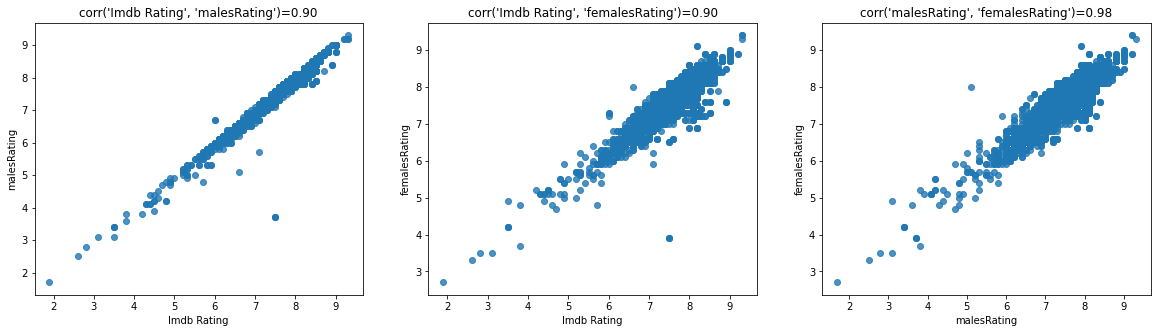

In [11]:
cols_for_correlations = ['Imdb Rating', 'malesRating', 'femalesRating']
plot_high_correlated_scatters(data[cols_for_correlations])

#### We will now examine the average of the votes of men and women by genre

In [12]:
data_ratePerGenre = []
genres = data["Genre"].drop_duplicates(inplace=False).reset_index(drop=True)
genres

df_ByGenre = pd.DataFrame(data, 
                columns =["Genre",'malesRating', 'femalesRating'])
df_ByGenre.set_index("Genre", inplace = True)

for genre in genres:
    tempPerGenre = df_ByGenre.loc[[genre]]
    tempMeanOfMales = round(tempPerGenre["malesRating"].mean(), 2)
    tempMeanOfFemales = round(tempPerGenre["femalesRating"].mean(), 2)
    data_ratePerGenre.append({"Genre":genre, "Avg of Males": tempMeanOfMales, "Avg of Females":tempMeanOfFemales})

df_ratePerGenre = pd.DataFrame(data_ratePerGenre)
df_ratePerGenre.set_index('Genre', inplace = True)

#### Table of average

In [13]:
df_ratePerGenre

,Avg of Males,Avg of Females
Genre,,
Action,7.84,7.78
Adventure,7.82,7.89
Animation,7.26,7.51
Biography,7.55,7.69
Comedy,7.87,7.91
Crime,7.89,7.83
Drama,8.24,8.17
Family,7.37,7.67
Fantasy,7.55,7.74


#### The regression line between the average of men and women

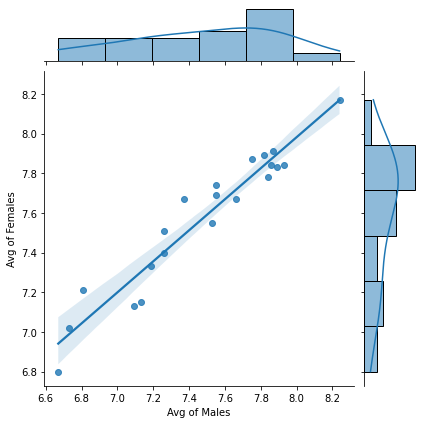

In [14]:
sns.jointplot(x="Avg of Males", y="Avg of Females", data=df_ratePerGenre, kind="reg");

#### Investigation of the number of votes

In [15]:
data_ratePerGenre = []
genres = data["Genre"].drop_duplicates(inplace=False).reset_index(drop=True)
genres

df_ByGenre = pd.DataFrame(data, 
                columns =["Genre",'malesCount', 'femalesCount'])
df_ByGenre.set_index("Genre", inplace = True)


for genre in genres:
    tempPerGenre = df_ByGenre.loc[[genre]]
    tempMeanOfMales = round(tempPerGenre["malesCount"].values.mean(), 2)
    tempMeanOfFemales = round(tempPerGenre["femalesCount"].values.mean(), 2)
    data_ratePerGenre.append({"Genre":genre, "Avg of count vote males": tempMeanOfMales, "Avg of count vote females":tempMeanOfFemales})

print ("Table of Avgs vote per Genre")
    
df_ratePerGenre = pd.DataFrame(data_ratePerGenre)
df_ratePerGenre.set_index('Genre', inplace = True)
df_ratePerGenre

Table of Avgs vote per Genre


,Avg of count vote males,Avg of count vote females
Genre,,
Action,238837.22,40426.64
Adventure,235121.04,51738.41
Animation,99023.19,31461.83
Biography,103541.59,23033.92
Comedy,143728.56,35590.70
Crime,175078.50,29985.66
Drama,258954.82,51538.27
Family,111934.52,37849.74
Fantasy,153281.76,42922.82


#### Comparison of averages by genre

Text(0, 0.5, 'Rating')

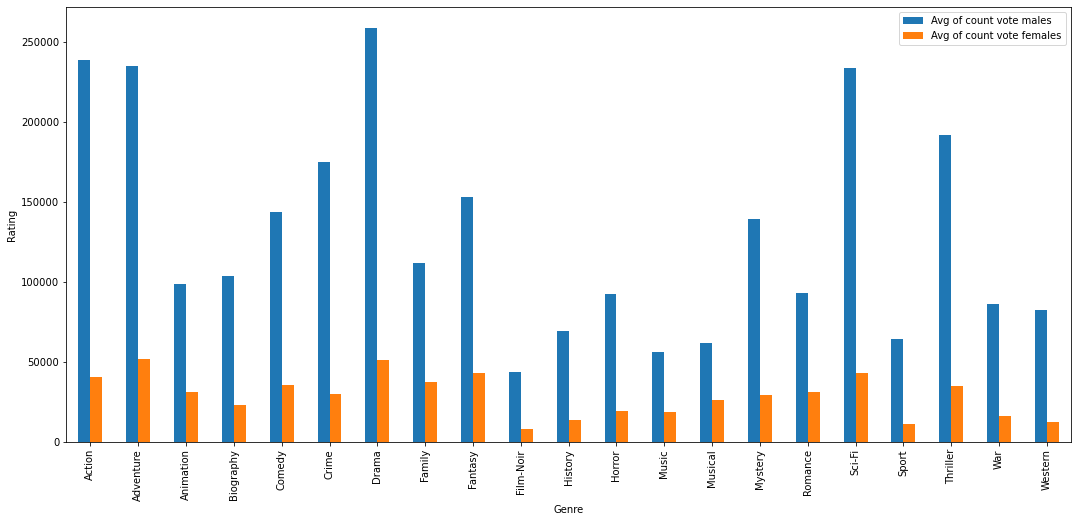

In [16]:
df_ratePerGenre.plot(kind='bar',figsize=(18,8))
plt.xlabel('Genre')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

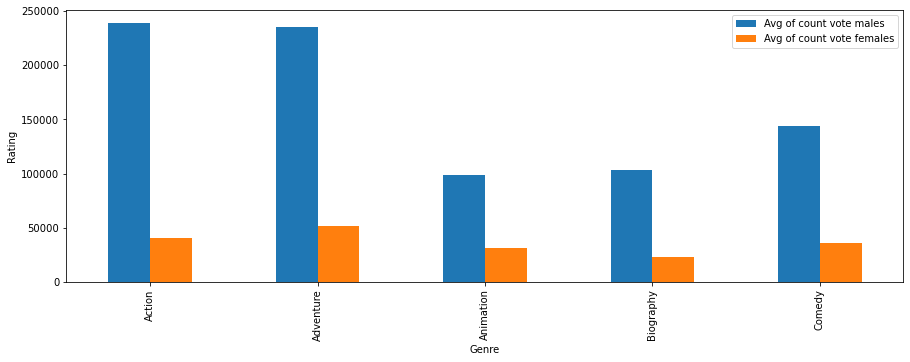

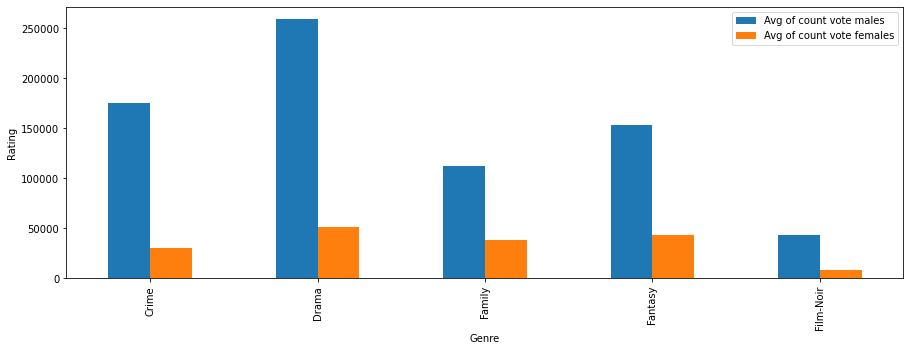

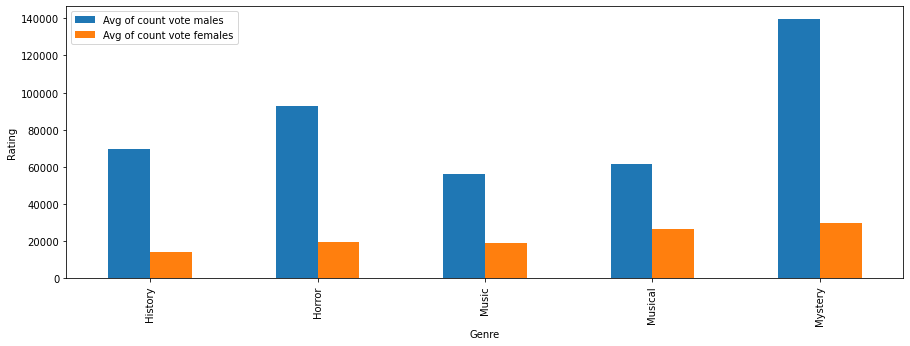

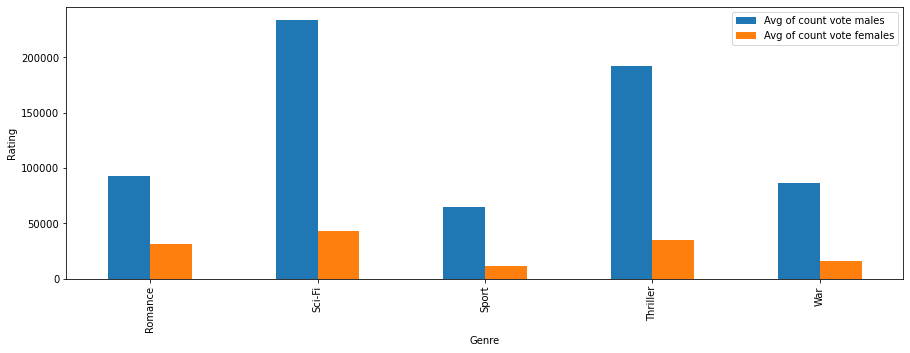

In [17]:
df_ratePerGenre[:5].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[5:10].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[10:15].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[15:20].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')

#### Display Of Describe

In [18]:
data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Year,Imdb Rating,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
count,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00
mean,1997.57,7.55,237881.73,76.86,7.50,138646.45,7.60,30916.20
std,21.44,0.64,307561.71,101.61,0.67,177012.99,0.60,39753.88
min,1920.00,1.90,25037.00,0.00,1.70,2582.00,2.70,110.00
25%,1989.00,7.20,49250.00,9.54,7.20,29307.50,7.30,5630.50
50%,2005.00,7.60,113143.00,53.71,7.60,67334.00,7.70,14094.00
75%,2013.00,8.00,289909.00,76.86,7.90,173077.00,8.00,39731.00
max,2022.00,9.30,2601939.00,936.66,9.30,1480017.00,9.40,294019.00


### in this histogram we can check correlation between columns

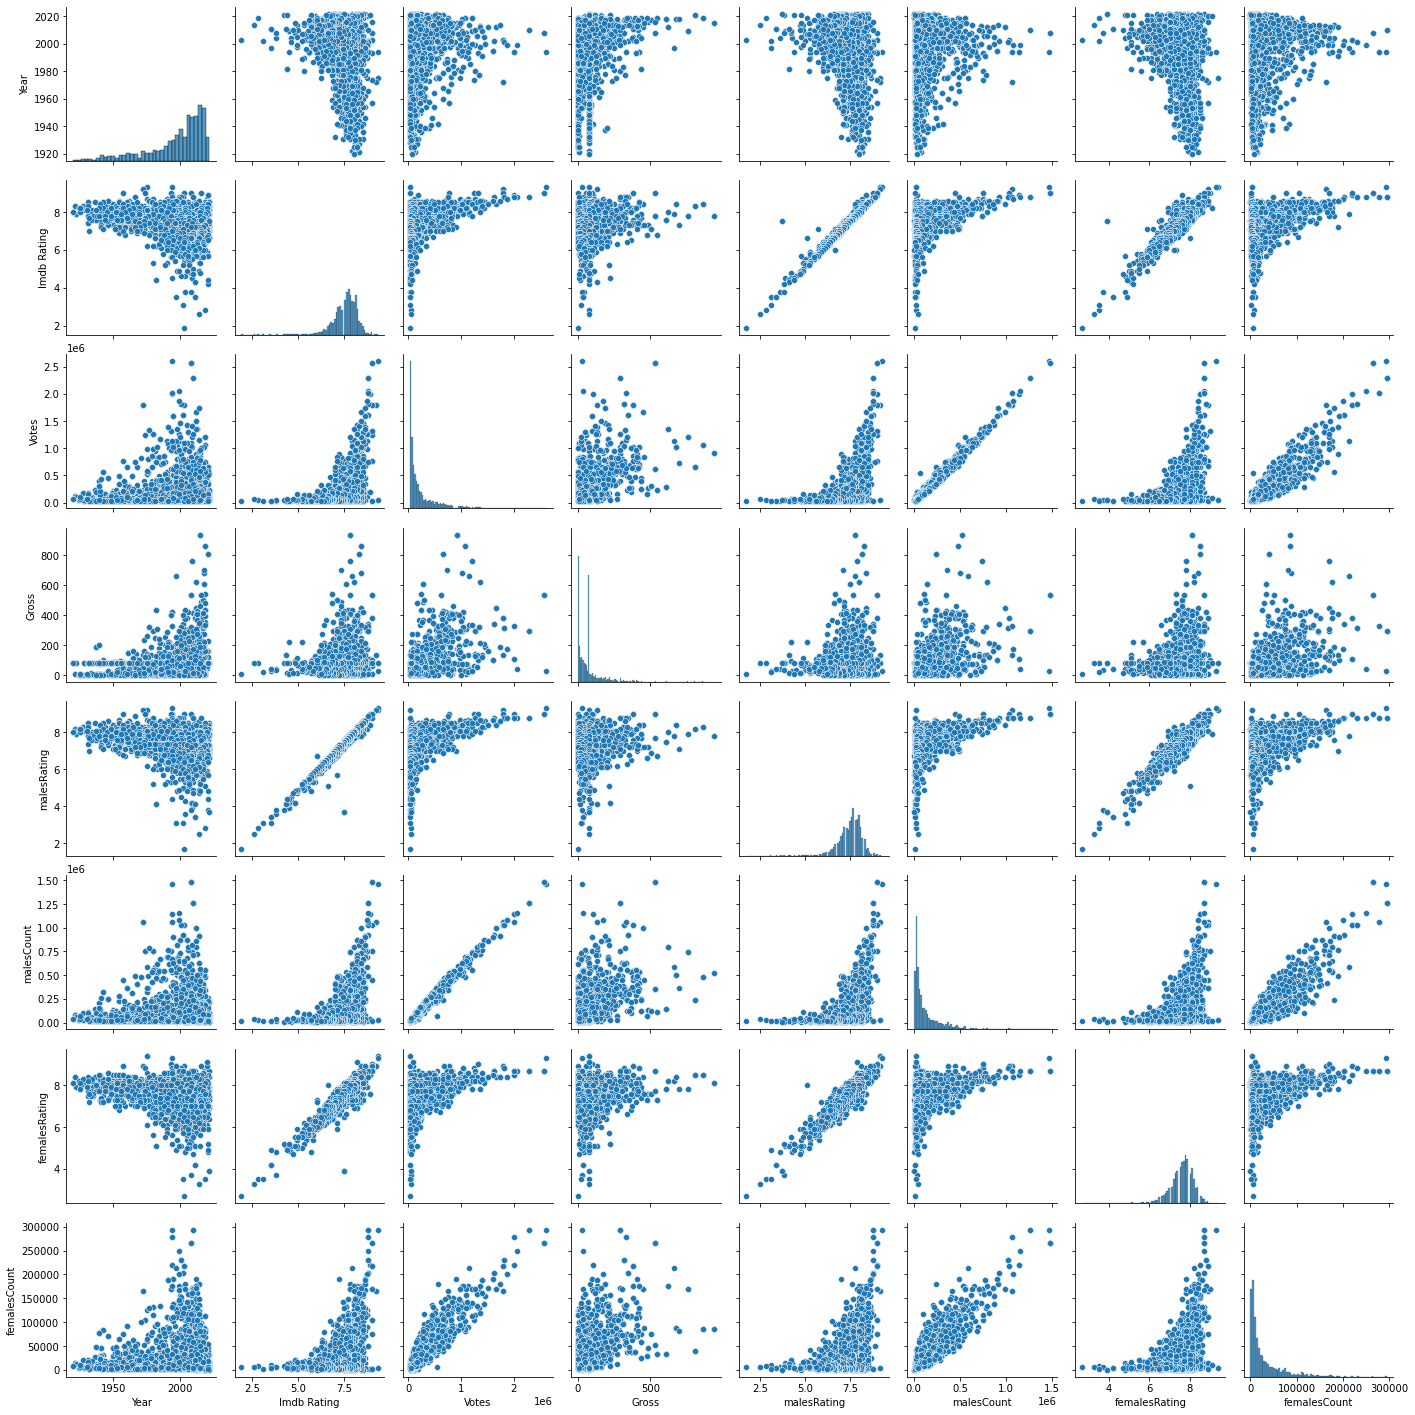

In [19]:
sns.pairplot(data)

### In this table, we can more accurately identify the dependencies between the variables

In [20]:
data.corr()

,Year,Imdb Rating,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
Year,1.000000,-0.213838,0.127298,0.186270,-0.237859,0.108706,-0.187815,0.128145
Imdb Rating,-0.213838,1.000000,0.419050,0.110932,0.980908,0.417096,0.901784,0.354067
Votes,0.127298,0.419050,1.000000,0.550743,0.427631,0.992728,0.408266,0.934612
Gross,0.186270,0.110932,0.550743,1.000000,0.098811,0.512214,0.166244,0.556168
malesRating,-0.237859,0.980908,0.427631,0.098811,1.000000,0.432233,0.897123,0.352497
malesCount,0.108706,0.417096,0.992728,0.512214,0.432233,1.000000,0.391934,0.909525
femalesRating,-0.187815,0.901784,0.408266,0.166244,0.897123,0.391934,1.000000,0.411257
femalesCount,0.128145,0.354067,0.934612,0.556168,0.352497,0.909525,0.411257,1.000000
